In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [618]:
# Read in the data
ks16 = pd.read_csv(r"C:\Users\sunny\Documents\Data\googleplaystore.csv")
ks16.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [619]:
# Convert to dataframe
df = pd.DataFrame(ks16)

In [620]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


Text(0.5, 1.0, 'App Downloads')

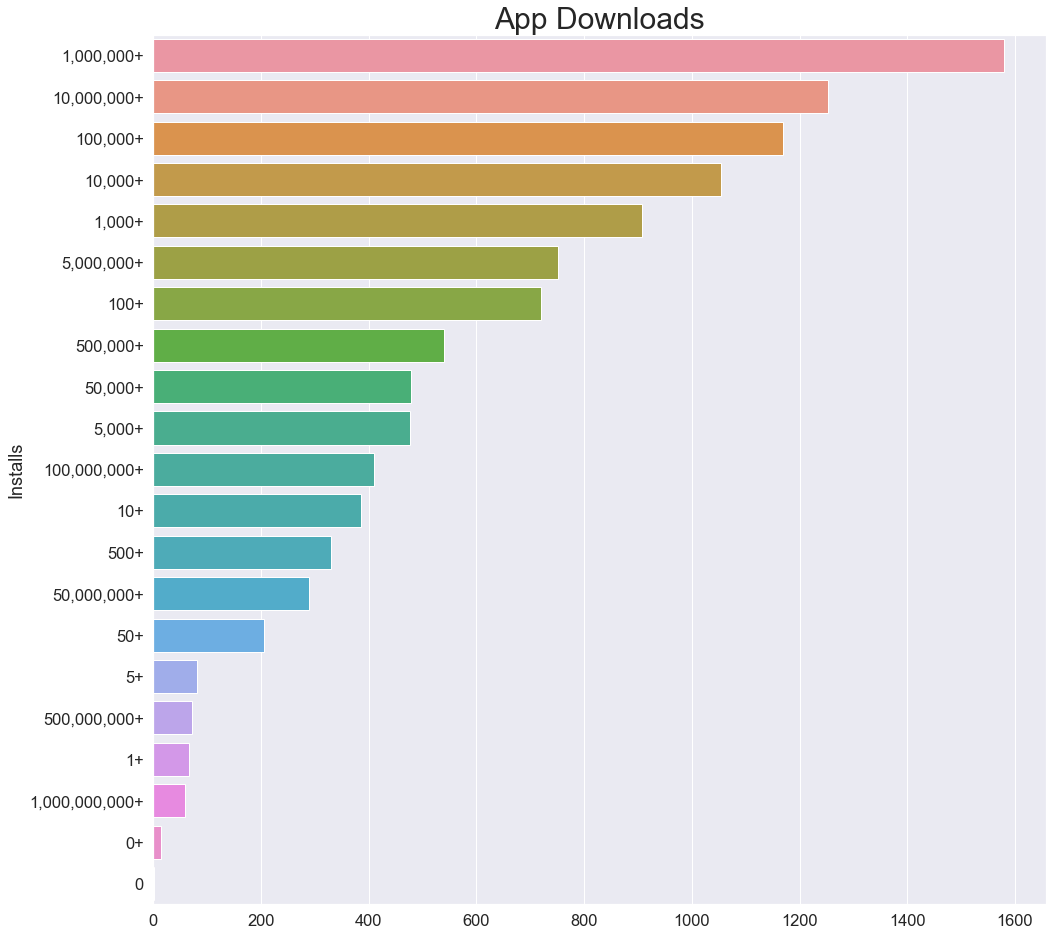

In [621]:
# Count plot of the amount of installs
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,1,1)
sns.set(font_scale = 1.5)
sns.countplot(y='Installs', data=df, order=df['Installs'].value_counts().index)
ax = plt.gca()
ax.set_xlabel('') 
ax.set_title("App Downloads", fontsize=30)

Text(0.5, 1.0, 'App Ratings')

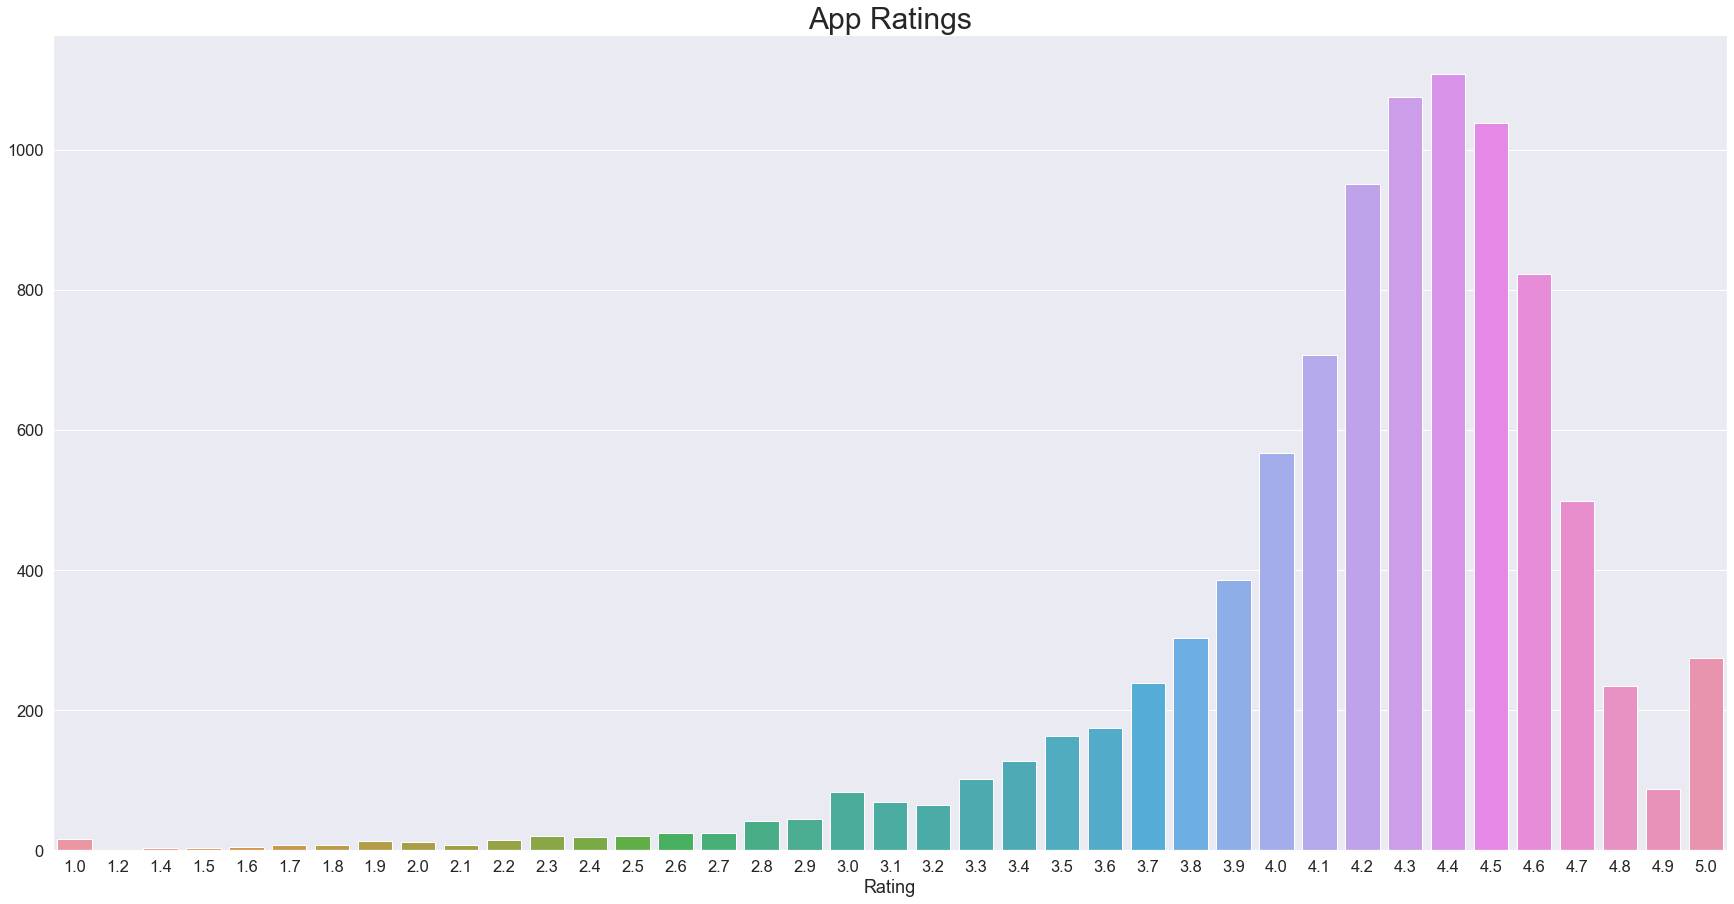

In [622]:
# Count plot of reviews
fig = plt.figure(figsize=(30,15))
fig.add_subplot(1,1,1)
sns.set(font_scale = 2)
# order=df['Installs'].value_counts().index
sns.countplot(x='Rating', data=df)
ax = plt.gca()
ax.set_ylabel('') 
ax.set_title("App Ratings", fontsize=30)

In [623]:
#Data Cleaning
# Replace underscores in category with spaces
df['Category'] = df['Category'].str.replace('_',' ')
# Replace plus signs in category with spaces
df['Installs'] = df['Installs'].str.replace('+',' ')
# Remove M from size
df['Size'] = df['Size'].str.replace('M','')


Text(0.5, 1.0, 'Top 5 Categories')

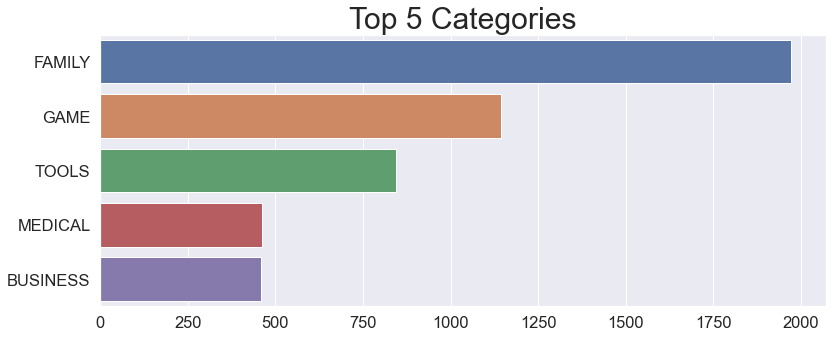

In [642]:
# Group by Category
fig = plt.figure(figsize=(13,5))
fig.add_subplot(1,1,1)
sns.set(font_scale = 1.5)
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().iloc[:5].index)
ax = plt.gca()
ax.set_xlabel('') 
ax.set_ylabel('') 
ax.set_title("Top 5 Categories", fontsize=30)

In [479]:
# Group by average rating
# fig = plt.figure(figsize=(16,16))
# fig.add_subplot(1,1,1)
# sns.set(font_scale = 1.5)
groupdf = df.groupby('Category'.)['Rating'].mean()
groupdf = groupdf.sort_values(ascending=False)
groupdf.head()
# groupdf.plot.barh()
# ax = plt.gca()
# ax.set_xlabel('') 
# ax.set_ylabel('')

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART AND DESIGN         4.358065
BOOKS AND REFERENCE    4.346067
PERSONALIZATION        4.335987
Name: Rating, dtype: float64

In [497]:
df.groupby('Type').size()

Type
Free    10039
Paid      800
dtype: int64

Text(0.5, 0, '')

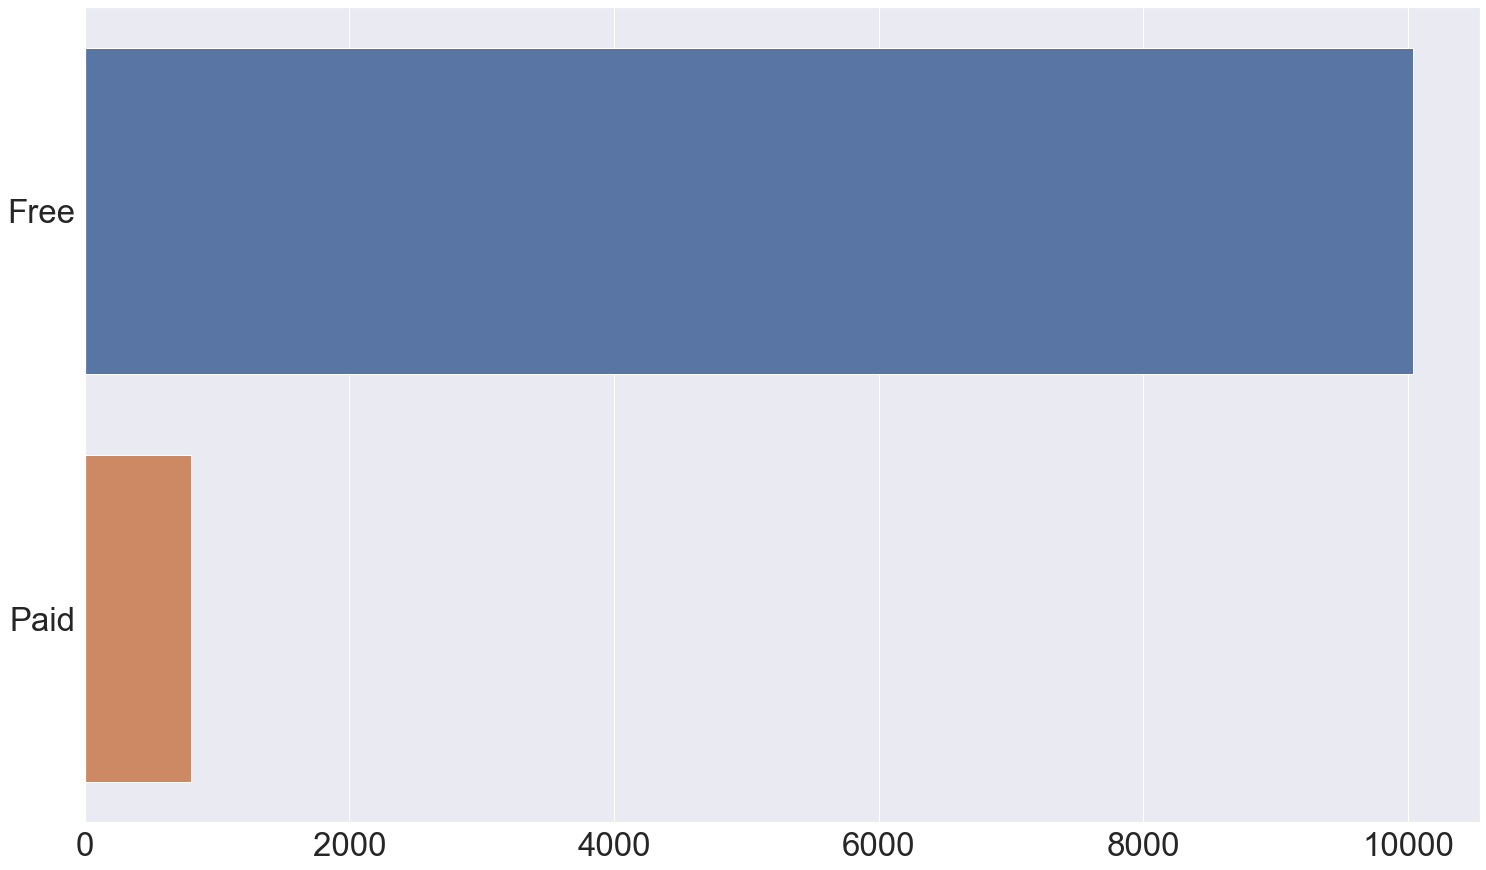

In [519]:
typedf = df.groupby('Type').size()
fig = plt.figure(figsize=(25,15))
fig.add_subplot(1,1,1)
sns.set(font_scale = 3)
sns.countplot(y='Type', data=df,
              order=df['Type'].value_counts().index)
ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 1.0, 'App Content Rating')

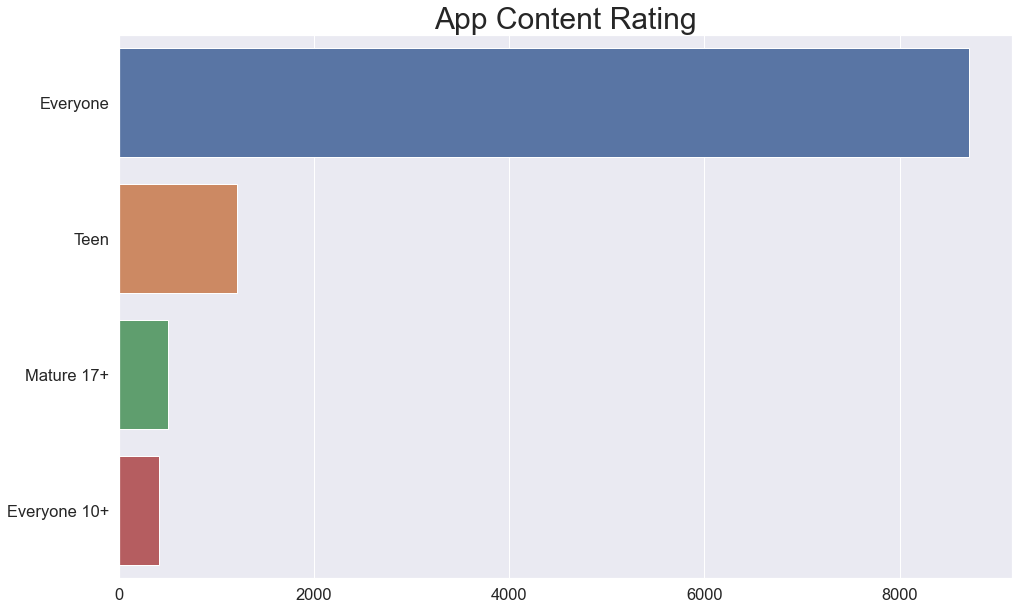

In [645]:
fig = plt.figure(figsize=(16,10))
fig.add_subplot(1,1,1)
sns.set(font_scale = 1.5)
sns.countplot(y = "Content Rating", data=df, order=df['Content Rating'].value_counts().iloc[:4].index)
ax = plt.gca()
ax.set_xlabel('') 
ax.set_ylabel('') 
ax.set_title("App Content R", fontsize=30)

# ax.set_title("Number Of Apps Per Category", fontsize=30)

In [646]:
array = ['Family', 'Game', 'Tools']
filterdf = df.loc[~df['Category'].isin(array)]
filterdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.7,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:

fig = plt.figure(figsize=(16,10))
fig.add_subplot(1,1,1)
sns.set(font_scale = 1.5)
sns.countplot(y = "Content Rating", data=df, order=df['Content Rating'].value_counts().iloc[:4].index)
ax = plt.gca()
ax.set_xlabel('') 
ax.set_ylabel('') 
ax.set_title("App Content Rating", fontsize=30)


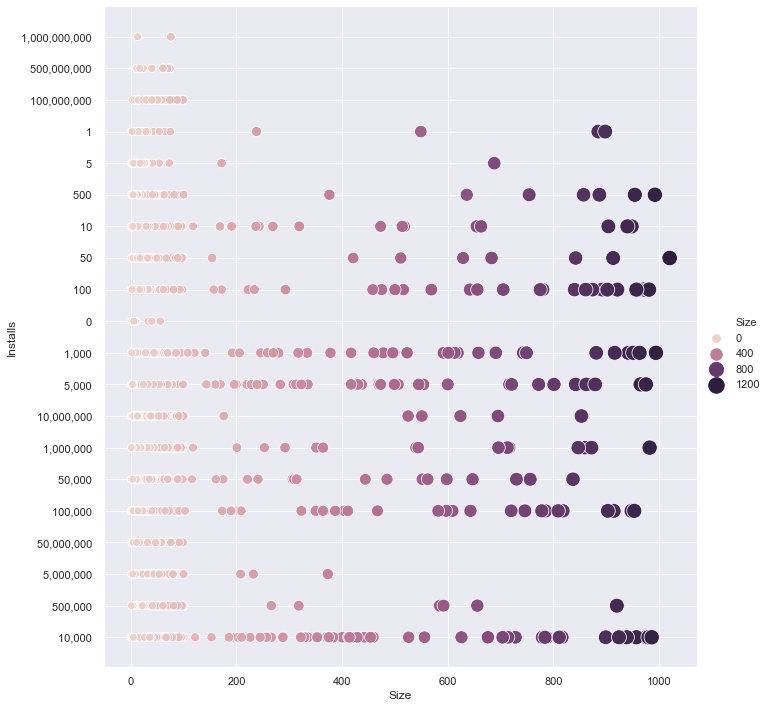

In [608]:
# Group by Category
df = pd.DataFrame(ks16)
sns.set(font_scale = 1)
sns.relplot(data = df, x = 'Size', y = 'Installs',
            hue="Size", size="Size", height=10, sizes=(60, 240))
ax = plt.gca()
ax.set_title("Correlation between ", fontsize=30)

NameError: name 'data' is not defined